In [1]:
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random
import powerlaw
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = r'E:\netData\APS\1 Authors\APS_authors2.0.zip'

In [3]:
df1 = pd.read_csv(path1)

In [4]:
df1['type'] = df1['type'].map(dict(zip(['获奖学者' , '非获奖学者'] , ['laureate' , 'non-laureate'])))

In [6]:
df1['I C'] = df1['C'] - df1['E C']

# fig 1

In [5]:
plt.rcParams['font.sans-serif'] = ['Arial']  # Use a Chinese font

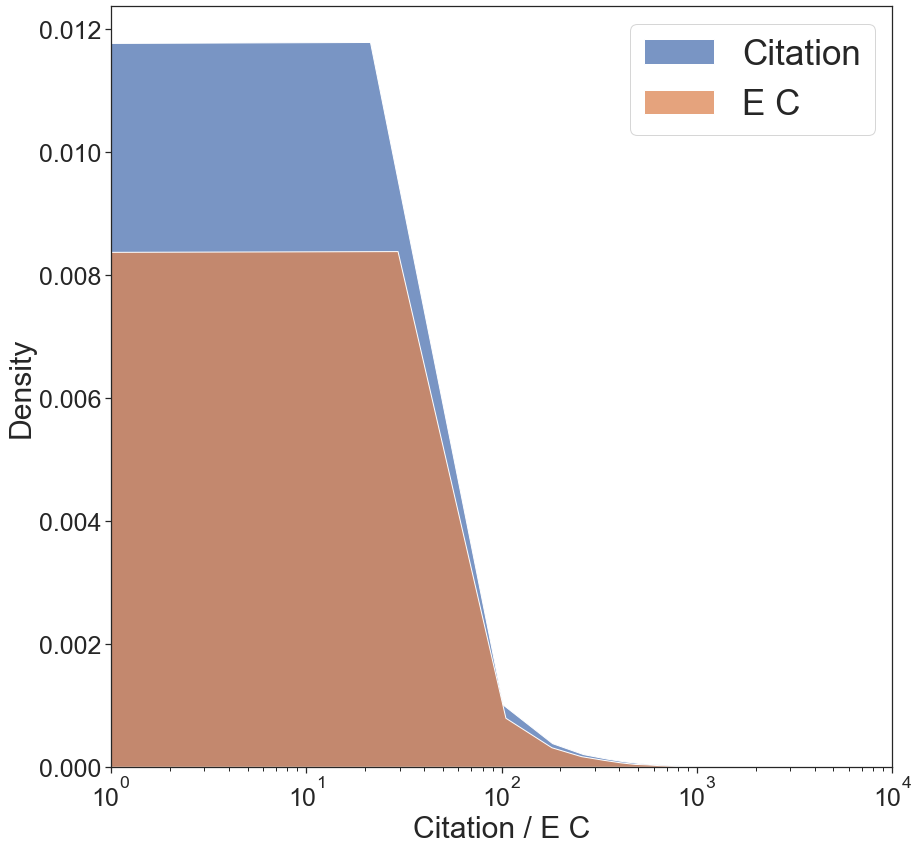

In [28]:
f, ax = plt.subplots(figsize=(14, 14))
sns.kdeplot(data=df1,x="C", multiple="stack",palette="plasma", label = 'Citation')
sns.kdeplot(data=df1,x="E C", multiple="stack",palette="plasma" , label = 'E C')
ax.set_xscale("log")
plt.xlim((1,10000))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.legend(fontsize = 35)
plt.xlabel(r'Citation / E C',fontsize = 30)
plt.ylabel(r'Density',fontsize = 30)
plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento External impact of scientists beyond the research team\fig\fig B2\1.pdf",bbox_inches = 'tight')

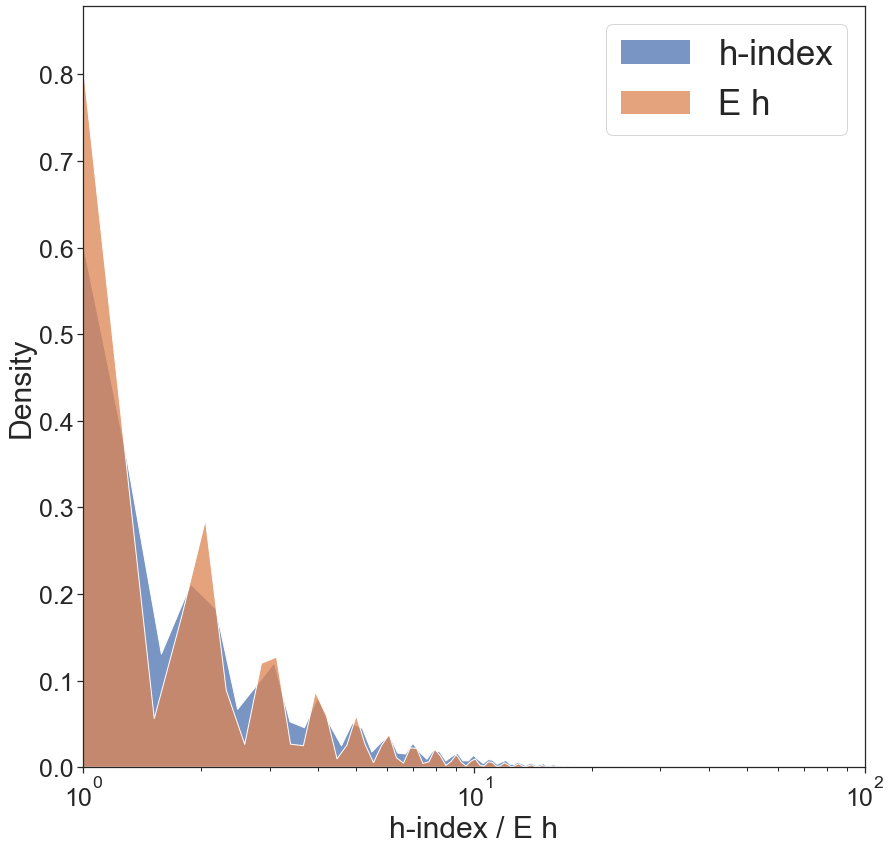

In [30]:
f, ax = plt.subplots(figsize=(14, 14))
sns.kdeplot(data=df1,x="h", multiple="stack",palette="plasma", label = 'h-index')
sns.kdeplot(data=df1,x="E h", multiple="stack",palette="plasma" , label = 'E h')
ax.set_xscale("log")
plt.xlim((1,100))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.legend(fontsize = 35)
plt.xlabel(r'h-index / E h',fontsize = 30)
plt.ylabel(r'Density',fontsize = 30)
plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento External impact of scientists beyond the research team\fig\fig B2\2.pdf",bbox_inches = 'tight')

In [7]:
P = df1['pub_num'].to_numpy()
P = P[P > 0]

C = df1['C'].to_numpy()
C = C[C > 0]

h = df1['h'].to_numpy()
h = h[h > 0]

EC = df1['E C'].to_numpy()
EC = EC[EC > 0]

IC = df1['I C'].to_numpy()
IC = IC[IC > 0]

Eh = df1['E h'].to_numpy()
Eh = Eh[Eh > 0]

In [8]:
fit1 = powerlaw.Fit(P)
fit2 = powerlaw.Fit(C)
fit3 = powerlaw.Fit(h)
fit4 = powerlaw.Fit(IC)
fit5 = powerlaw.Fit(EC)
fit6 = powerlaw.Fit(Eh)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Calculating best minimal value for power law fit


Calculating best minimal value for power law fit


In [11]:
labellst = [ 'Publication' , 'Citation' , 'h-index','IC','EC' , 'Eh']
dlst = ['pub_num','C','h','I C','E C','E h']
fitlst = [fit1, fit2,fit3,fit4,fit5,fit6]

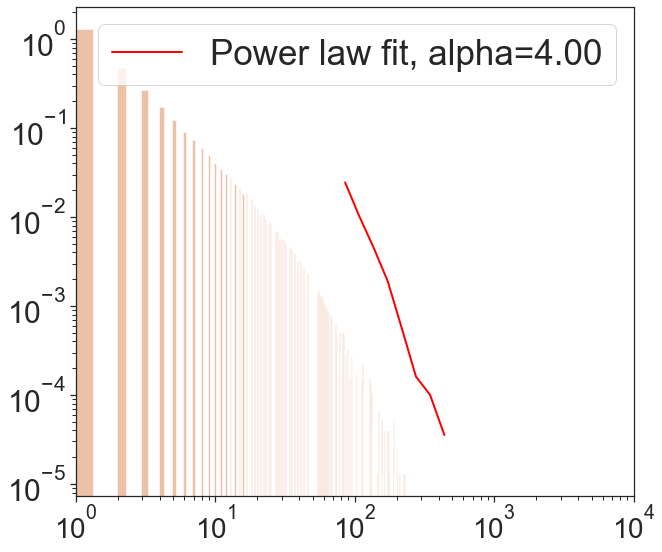

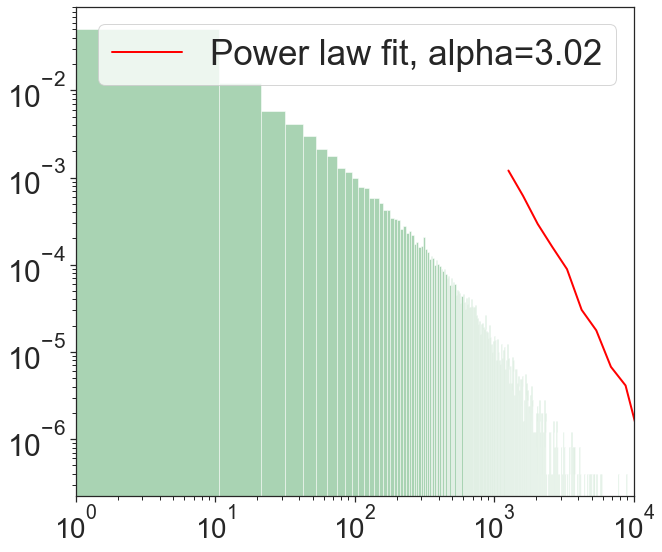

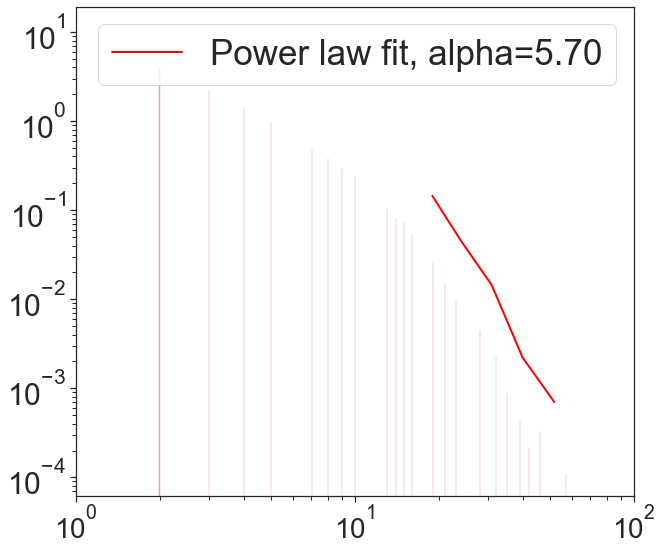

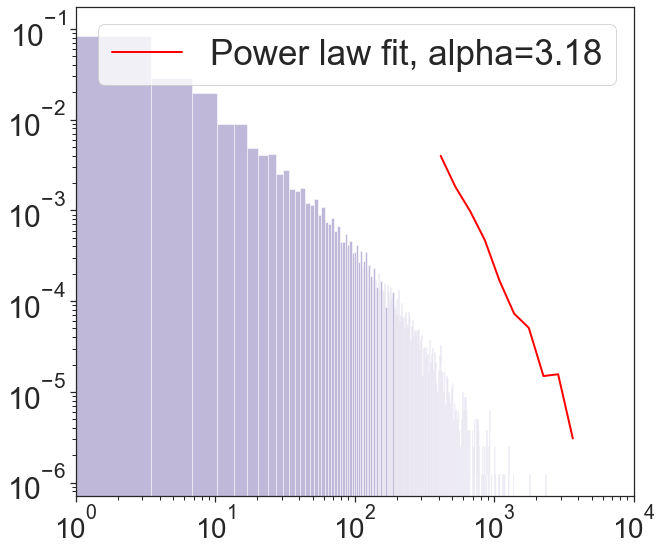

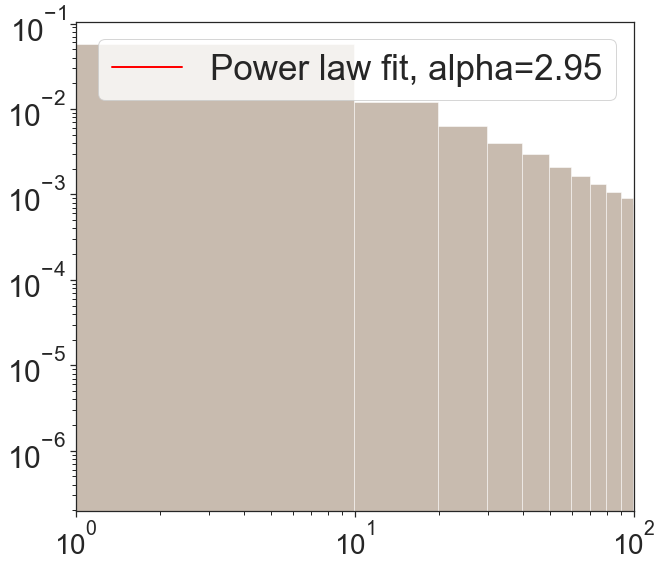

In [15]:
c = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(5):
    fig, ax = plt.subplots(figsize=(10, 9))
    
    ax.hist(df1[dlst[i]], bins=1500,  density=True, alpha=0.5, color=c[i+1])
    fitlst[i].plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fitlst[i].alpha:.2f}')
    ax.legend()
    if i == 2 or i == 4:
        plt.xlim((1,100))
    else:
        plt.xlim((1,10000))
    #ax.set_xlabel(labellst[i] , fontsize=30)
    #ax.set_ylabel('P({})'.format(dlst[i]) , fontsize=30)
    plt.xticks( fontsize=28)
    plt.yticks(fontsize=30)
    plt.legend(fontsize = 35 )
    plt.rcParams['font.sans-serif'] = ['Arial']

    plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento EC Eh\fig\fig 2\{}.png".format(i),bbox_inches = 'tight')

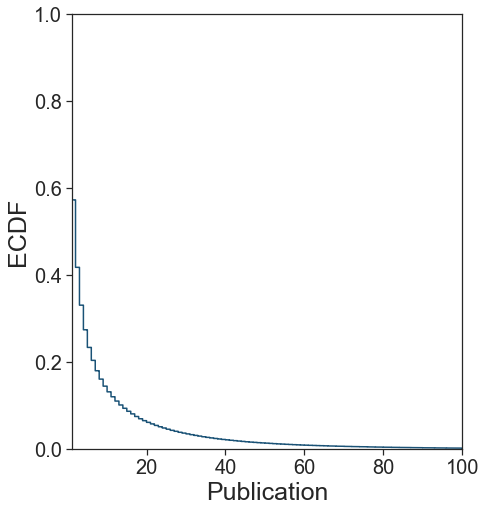

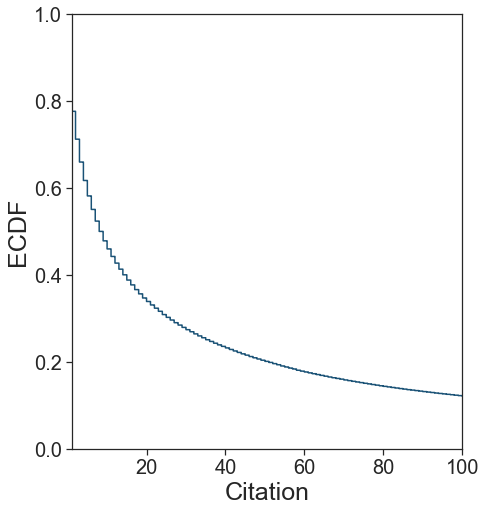

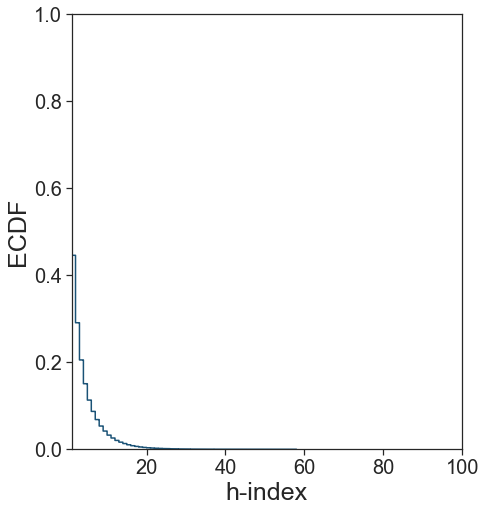

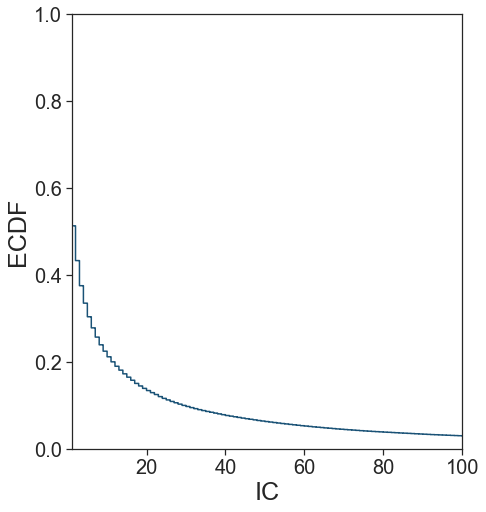

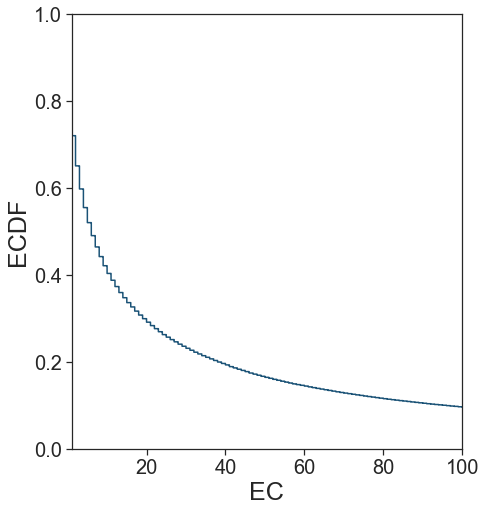

In [14]:
for i in range(5):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(7, 8))
    sns.ecdfplot(data=df1,x=dlst[i],c='#1A5276', complementary=True)
    #ax.yaxis.grid(True)
    plt.xlim((1,100))
    # ax.set_xscale("log")
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.xlabel(labellst[i],fontsize = 25)
    plt.ylabel(r'ECDF',fontsize = 25)
    plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento EC Eh\fig\fig 2\{}.pdf".format(i),bbox_inches = 'tight')